In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,confusion_matrix
from tqdm import tqdm

In [2]:
df=pd.read_csv('D:\\ML\\csv\\healthcare-dataset-stroke-data.csv')

In [3]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
df.drop(['id'],axis=1,inplace=True)


In [5]:
df.shape


(5110, 11)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [7]:
df.duplicated().sum()

0

<Axes: >

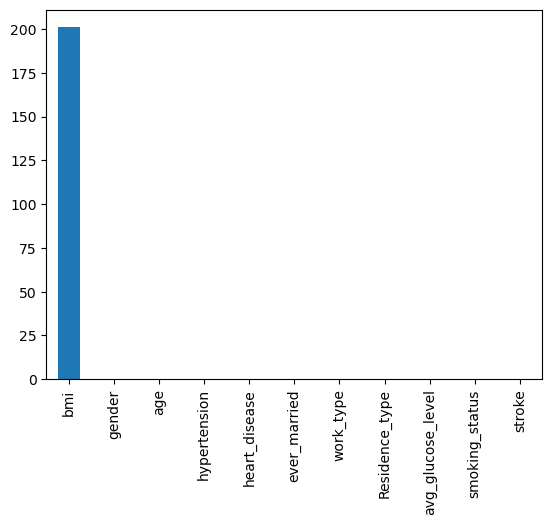

In [8]:
df.isnull().sum().sort_values(ascending=False).plot(kind='bar')

In [9]:
from sklearn.impute import SimpleImputer
scaler=SimpleImputer(missing_values=np.nan,fill_value='mean')
df['bmi']=scaler.fit_transform(np.array(df['bmi']).reshape(-1,1))

In [10]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                5110 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.698018,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.800000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.400000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,32.800000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


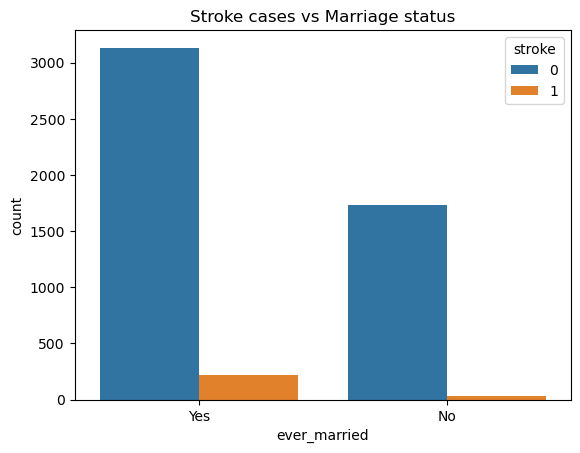

In [11]:
sns.countplot(x='ever_married', hue='stroke', data=df)
plt.title('Stroke cases vs Marriage status')
plt.show()

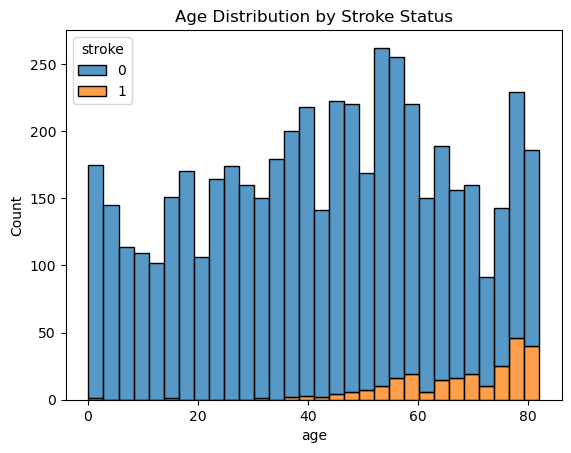

In [12]:
sns.histplot(data=df, x='age', hue='stroke', multiple='stack', bins=30)
plt.title('Age Distribution by Stroke Status')
plt.show()

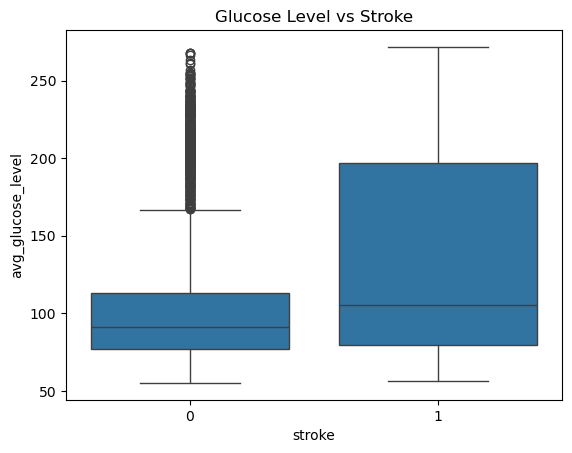

In [13]:
sns.boxplot(x='stroke', y='avg_glucose_level', data=df)
plt.title('Glucose Level vs Stroke')
plt.show()

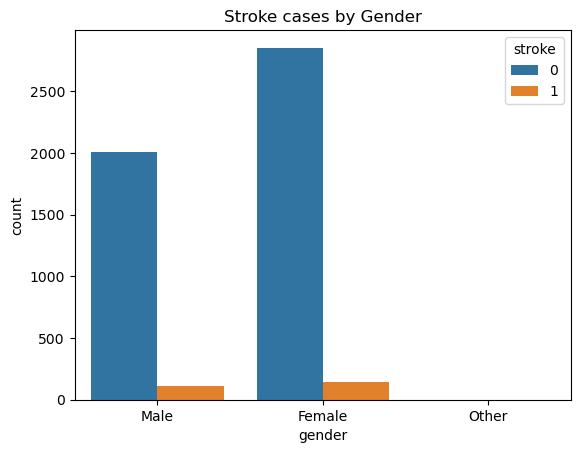

In [14]:
sns.countplot(x='gender', hue='stroke', data=df)
plt.title('Stroke cases by Gender')
plt.show()

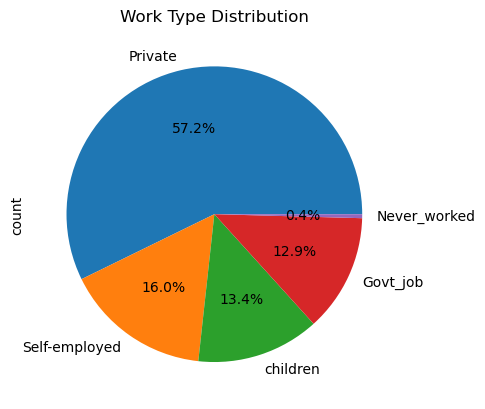

In [15]:
df['work_type'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Work Type Distribution')
plt.show()

In [16]:
cols=df.select_dtypes('object')
print(cols)

      gender ever_married      work_type Residence_type   smoking_status
0       Male          Yes        Private          Urban  formerly smoked
1     Female          Yes  Self-employed          Rural     never smoked
2       Male          Yes        Private          Rural     never smoked
3     Female          Yes        Private          Urban           smokes
4     Female          Yes  Self-employed          Rural     never smoked
...      ...          ...            ...            ...              ...
5105  Female          Yes        Private          Urban     never smoked
5106  Female          Yes  Self-employed          Urban     never smoked
5107  Female          Yes  Self-employed          Rural     never smoked
5108    Male          Yes        Private          Rural  formerly smoked
5109  Female          Yes       Govt_job          Urban          Unknown

[5110 rows x 5 columns]


In [17]:
for col in cols.columns:
    print(f'number of column {col} is :',df[col].nunique())
    print(f'number of column {col} is :',df[col].unique())

number of column gender is : 3
number of column gender is : ['Male' 'Female' 'Other']
number of column ever_married is : 2
number of column ever_married is : ['Yes' 'No']
number of column work_type is : 5
number of column work_type is : ['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
number of column Residence_type is : 2
number of column Residence_type is : ['Urban' 'Rural']
number of column smoking_status is : 4
number of column smoking_status is : ['formerly smoked' 'never smoked' 'smokes' 'Unknown']


In [18]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

In [19]:
for col in ['gender','ever_married','work_type','smoking_status']:
    le=LabelEncoder()
    df[col]=le.fit_transform(df[col])

In [20]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,Urban,228.69,36.600000,1,1
1,0,61.0,0,0,1,3,Rural,202.21,28.893237,2,1
2,1,80.0,0,1,1,2,Rural,105.92,32.500000,2,1
3,0,49.0,0,0,1,2,Urban,171.23,34.400000,3,1
4,0,79.0,1,0,1,3,Rural,174.12,24.000000,2,1


In [21]:
onehotencoder = OneHotEncoder()
X= onehotencoder.fit_transform(df[['Residence_type']]).toarray()
for index , col in enumerate(onehotencoder.categories_[0]) :
    df[col]=X[:,index]

In [22]:
df.drop(['Residence_type'],axis =1,inplace=True)

In [23]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,avg_glucose_level,bmi,smoking_status,stroke,Rural,Urban
0,1,67.0,0,1,1,2,228.69,36.600000,1,1,0.0,1.0
1,0,61.0,0,0,1,3,202.21,28.893237,2,1,1.0,0.0
2,1,80.0,0,1,1,2,105.92,32.500000,2,1,1.0,0.0
3,0,49.0,0,0,1,2,171.23,34.400000,3,1,0.0,1.0
4,0,79.0,1,0,1,3,174.12,24.000000,2,1,1.0,0.0


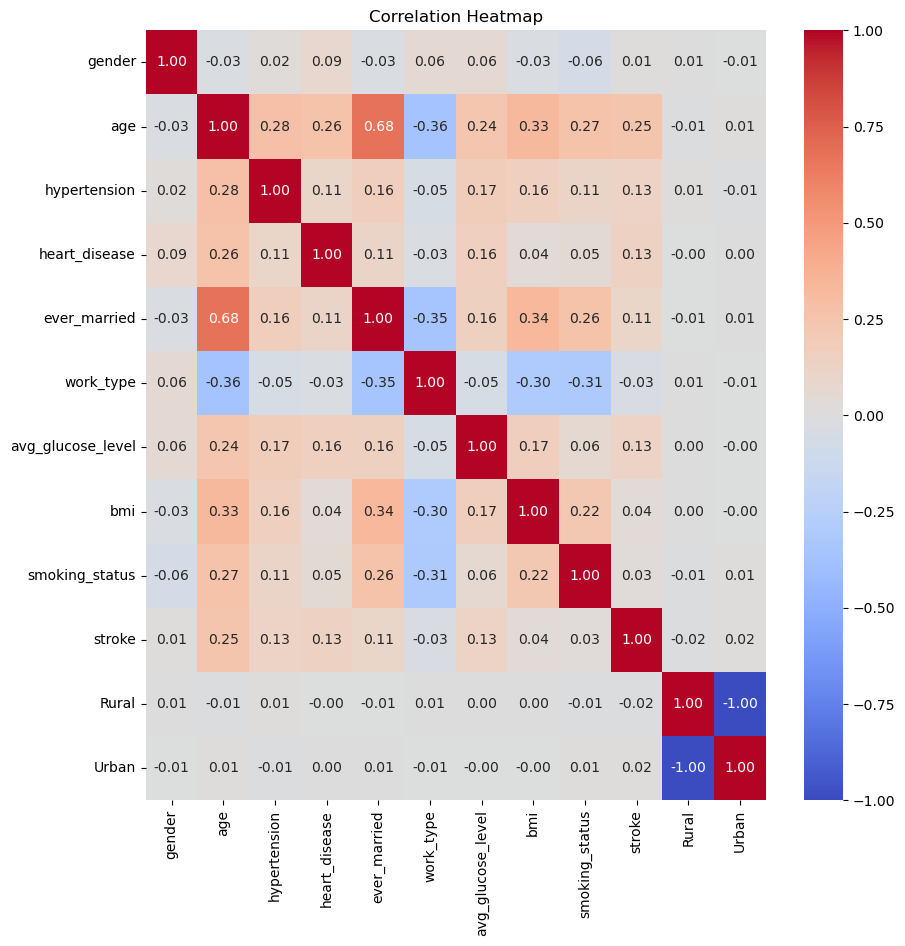

In [24]:
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm',fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   int32  
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   int32  
 5   work_type          5110 non-null   int32  
 6   avg_glucose_level  5110 non-null   float64
 7   bmi                5110 non-null   float64
 8   smoking_status     5110 non-null   int32  
 9   stroke             5110 non-null   int64  
 10  Rural              5110 non-null   float64
 11  Urban              5110 non-null   float64
dtypes: float64(5), int32(4), int64(3)
memory usage: 399.3 KB


In [26]:
X = df.drop(['stroke'],axis =1)

In [27]:
X.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,avg_glucose_level,bmi,smoking_status,Rural,Urban
0,1,67.0,0,1,1,2,228.69,36.600000,1,0.0,1.0
1,0,61.0,0,0,1,3,202.21,28.893237,2,1.0,0.0
2,1,80.0,0,1,1,2,105.92,32.500000,2,1.0,0.0
3,0,49.0,0,0,1,2,171.23,34.400000,3,0.0,1.0
4,0,79.0,1,0,1,3,174.12,24.000000,2,1.0,0.0


In [28]:
y=df['stroke']

In [29]:
from imblearn.over_sampling import SMOTE
sm=SMOTE(random_state=42)
X,y=sm.fit_resample(X,y)

In [30]:
scaler = RobustScaler() 
X_scaler = scaler.fit_transform(X)

In [31]:
X_scaler

array([[ 1.        ,  0.23025771,  0.        , ...,  0.        ,
        -0.37183336,  0.37183336],
       [ 0.        ,  0.04843952,  0.        , ...,  0.5       ,
         0.62816664, -0.62816664],
       [ 1.        ,  0.6241971 ,  0.        , ...,  0.5       ,
         0.62816664, -0.62816664],
       ...,
       [ 1.        ,  0.6241971 ,  0.        , ...,  0.        ,
        -0.08458712,  0.08458712],
       [ 0.        ,  0.47128018,  0.        , ...,  0.        ,
         0.58190845, -0.58190845],
       [ 0.        ,  0.03230342,  0.        , ...,  0.        ,
         0.36192094, -0.36192094]])

In [32]:
X_train,X_test,y_train,y_test = train_test_split(X_scaler,y,test_size=0.2,random_state=42)
X_train.shape ,y_train.shape

((7777, 11), (7777,))

In [33]:
X_test.shape ,y_test.shape

((1945, 11), (1945,))

In [89]:
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,confusion_matrix
from tqdm import tqdm

In [91]:
Models = {
    'LogisticRegression': LogisticRegression(max_iter=1000),
    'SGDClassifier': SGDClassifier(loss='log_loss', max_iter=1000),
    'GaussianNB':GaussianNB(),
    'KNeighborsClassifier':KNeighborsClassifier(n_neighbors=10),
    'DecisionTreeClassifier': DecisionTreeClassifier(random_state=42),
    'RandomForestClassifier': RandomForestClassifier(n_estimators=100, random_state=42),
    'GradientBoostingClassifier': GradientBoostingClassifier(n_estimators=100, random_state=42),
    'AdaBoostClassifier': AdaBoostClassifier(n_estimators=50, random_state=42),
    'SVC': SVC(kernel='rbf', C=1, random_state=42)
    
}

In [93]:
ModelName = []
ModelAccuracy = []
for nameModel, model in tqdm(Models.items()):
    model.fit(X_train, y_train)  
    y_pred = model.predict(X_test)
    ModelName.append(nameModel)
    ModelAccuracy.append([
        accuracy_score(y_test, y_pred),
        precision_score(y_test, y_pred,zero_division=1),
        recall_score(y_test, y_pred),
        f1_score(y_test, y_pred),
        model.score(X_train, y_train)
        
    ])
Model_accuracy = pd.DataFrame(ModelAccuracy, index=ModelName, columns=['Accuracy', 'Precision', 'Recall', 'F1 Score','score_train'])

Model_accuracy

 78%|█████████████████████████████████████████████████████████████████▎                  | 7/9 [00:02<00:00,  2.30it/s]C:\Users\Ahmed\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:05<00:00,  1.65it/s]


,Accuracy,Precision,Recall,F1 Score,score_train
LogisticRegression,0.808226,0.794089,0.830928,0.812091,0.797608
SGDClassifier,0.808740,0.802020,0.818557,0.810204,0.796580
GaussianNB,0.793316,0.754025,0.869072,0.807471,0.794394
KNeighborsClassifier,0.887404,0.852582,0.936082,0.892383,0.905362
DecisionTreeClassifier,0.923907,0.908549,0.942268,0.925101,1.000000
RandomForestClassifier,0.956812,0.957645,0.955670,0.956656,1.000000
GradientBoostingClassifier,0.898715,0.896410,0.901031,0.898715,0.916292
AdaBoostClassifier,0.877121,0.871066,0.884536,0.877749,0.881188
SVC,0.878663,0.860511,0.903093,0.881288,0.891475


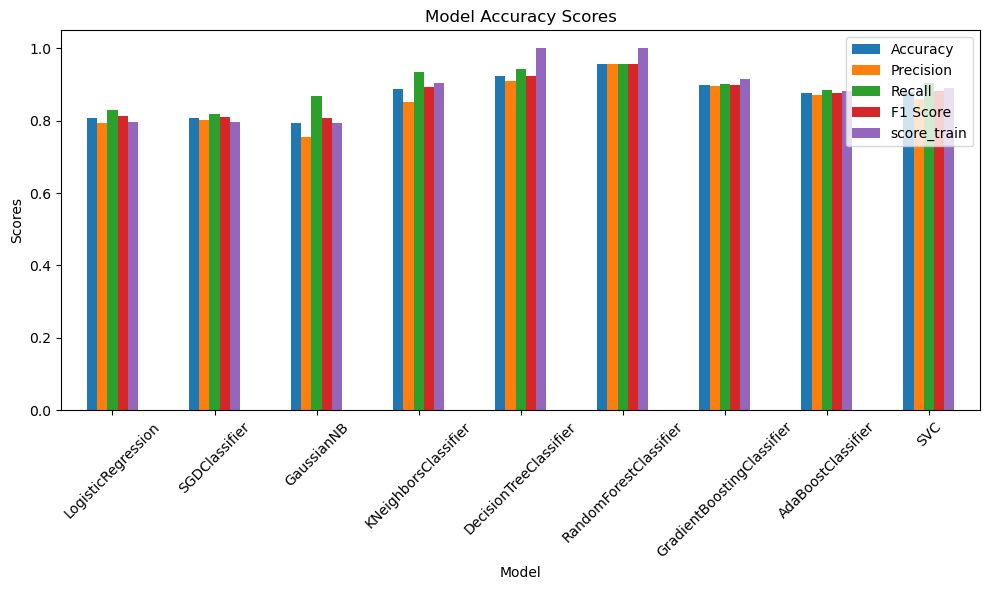

In [94]:
Model_accuracy.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Model')  
plt.ylabel('Scores')  
plt.title('Model Accuracy Scores')  
plt.xticks(rotation=45)  
plt.legend(loc='upper right') 
plt.tight_layout()  
plt.show()

In [97]:
cm = confusion_matrix(y_pred, y_test)
cm

array([[833,  94],
       [142, 876]], dtype=int64)

<Axes: >

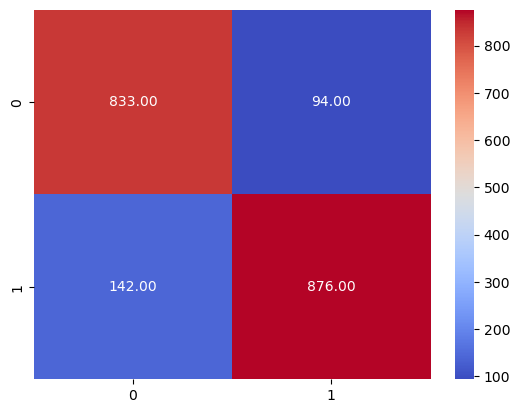

In [99]:
import seaborn as sns
sns.heatmap(cm,  annot=True, fmt=".2f" ,cmap="coolwarm")

In [40]:
print(y_pred[:5].tolist())

[0, 1, 0, 0, 1]


In [101]:
print(y_test[:5].tolist())

[0, 1, 0, 0, 1]


In [103]:
best_model = RandomForestClassifier()
best_model.fit(X_train, y_train)

RandomForestClassifier()

In [105]:
y_pred = best_model.predict(X_test)

In [107]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of RandomForestClassifier: {accuracy:.6f}")

Accuracy of RandomForestClassifier: 0.956812


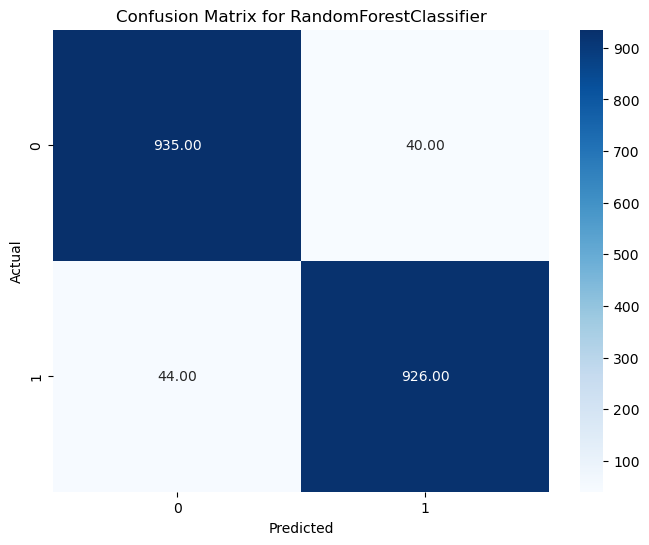

In [113]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='.2f', cmap='Blues')
plt.title('Confusion Matrix for RandomForestClassifier')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()